In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_excel('AirQualityUCI.xlsx')

In [3]:
df_num = df.iloc[:,2:]


In [4]:
df_num.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [5]:
X  = df_num.iloc[:,:-1]

In [6]:
X.shape

(9357, 12)

In [7]:
Y = df_num.iloc[:,-1]

In [8]:
import seaborn as sns
%matplotlib inline

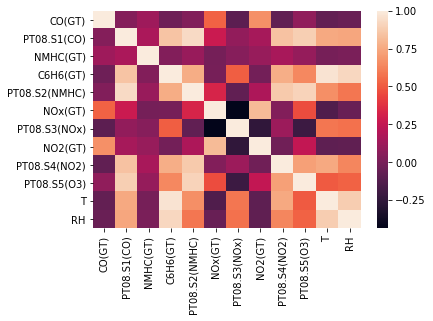

In [9]:
sns.heatmap(X.corr())

## We can see redundancy in our data

## find the mean vector

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scal = sc.fit_transform(X)
Y_scal = sc.fit_transform(Y.reshape((-1,1)))

C:\Users\Rapt\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


In [11]:
mean_vector = np.mean(X_scal, axis =0)

In [12]:
diff_from_mean = X_scal - mean_vector

In [13]:
a=np.array([[1,2,3],[3,4,5]])
b = np.array([[2,3,4],[9,3,4]])
np.dot(a[:,1],b[:,2])

24

## Covariance Matrix

In [14]:
covariance_matrix = np.zeros((len(X.columns), len(X.columns))) 

In [15]:
row = len(X.values)

In [16]:
for i in range(len(X.columns)):
    for j in range(len(X.columns)):
        covariance_matrix[i,j]= np.dot(diff_from_mean[:,i],diff_from_mean[:,j])/row

In [17]:
covariance_frame = pd.DataFrame(np.triu(covariance_matrix), columns = X.columns)

In [18]:
covariance_frame.replace(0,'')

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH
0,1,0.0414149,0.128351,-0.0313773,0.0299394,0.52645,-0.0899806,0.67114,-0.0737205,0.0803156,-0.0689517,-0.048231
1,,1,0.170009,0.852659,0.933101,0.278029,0.0869312,0.154058,0.845133,0.892436,0.754806,0.745344
2,,,1,0.0373289,0.110097,-0.00441289,0.0488322,0.103345,0.162689,0.101189,-7.57769e-06,0.008288
3,,,,1,0.767401,-0.00116298,0.512154,-0.0109714,0.774649,0.641306,0.97137,0.925068
4,,,,,1,0.331331,-0.0737483,0.176569,0.874761,0.909909,0.668984,0.585775
5,,,,,,1,-0.436083,0.817138,0.0355795,0.461916,-0.138457,-0.053008
6,,,,,,,1,-0.256217,0.122672,-0.208935,0.588061,0.573513
7,,,,,,,,1,-0.0220925,0.253469,-0.0840845,-0.081300
8,,,,,,,,,1,0.72367,0.755053,0.640685
9,,,,,,,,,,1,0.503659,0.524922


In [19]:
w,v = np.linalg.eig(covariance_matrix)

In [20]:
w, v

(array([5.74964294e+00, 2.86531560e+00, 1.34643181e+00, 1.02563039e+00,
        3.91886304e-01, 2.50415995e-01, 1.24937052e-01, 1.04162245e-01,
        7.26243539e-02, 2.04480307e-03, 2.81095237e-02, 3.87989737e-02]),
 array([[-0.00584583,  0.38205915,  0.52165511, -0.03072887,  0.70216059,
          0.2827754 ,  0.08416449,  0.01711158,  0.02335495,  0.00149534,
          0.00328953,  0.00138156],
        [-0.39927511,  0.09482159, -0.11217599, -0.05190863, -0.03646396,
          0.16727554, -0.0659843 ,  0.09929232,  0.02194387, -0.02849706,
         -0.327857  ,  0.8148637 ],
        [-0.04882359,  0.06820521,  0.09226538, -0.96095434, -0.17217433,
          0.06582872, -0.04508593, -0.02449134,  0.11377828, -0.00677211,
         -0.00309713, -0.10680464],
        [-0.39749641, -0.12115867,  0.14837956,  0.07685196, -0.0532275 ,
          0.01503645, -0.10580565,  0.18034296,  0.27538028,  0.8044796 ,
          0.12155538, -0.1217347 ],
        [-0.37750677,  0.14881346, -0.24022592

## So these eigen vectors are the principal components or indicates the direction where information is spread and eigen values shows the variance indicated by these vectors

In [21]:
principal_components = pd.DataFrame(np.transpose(v),columns =['pca_' + str(i) for i in range(12)])

In [22]:
principal_components

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11
0,-0.005846,-0.399275,-0.048824,-0.397496,-0.377507,-0.066548,-0.120220,-0.036686,-0.369421,-0.340373,-0.371450,-0.356537
1,0.382059,0.094822,0.068205,-0.121159,0.148813,0.533637,-0.385455,0.498676,-0.014459,0.233420,-0.193404,-0.171587
2,0.521655,-0.112176,0.092265,0.148380,-0.240226,0.074968,0.557214,0.339282,-0.190184,-0.275137,0.187629,0.220818
3,-0.030729,-0.051909,-0.960954,0.076852,-0.014559,0.170811,-0.014408,0.056284,-0.120603,0.012215,0.088203,0.108554
4,0.702161,-0.036464,-0.172174,-0.053228,0.105421,-0.426466,-0.226963,-0.264004,0.344410,-0.068422,0.066400,-0.176799
5,0.282775,0.167276,0.065829,0.015036,-0.135861,0.075617,-0.100902,-0.495914,-0.506980,0.354263,-0.224141,0.417660
6,0.084164,-0.065984,-0.045086,-0.105806,0.220002,0.456458,0.563385,-0.430962,0.193510,0.100244,-0.194403,-0.360780
7,0.017112,0.099292,-0.024491,0.180343,0.243858,-0.344297,0.169481,0.145307,-0.530338,0.348386,0.177259,-0.542980
8,0.023355,0.021944,0.113778,0.275380,0.241489,0.346796,-0.307678,-0.302247,-0.280245,-0.539197,0.395763,-0.140324
9,0.001495,-0.028497,-0.006772,0.804480,-0.315093,0.015972,-0.079460,-0.012470,0.145662,-0.006922,-0.427929,-0.203853


In [23]:
X_after_pca = np.zeros((len(X_scal),12))
for i in range(len(X_scal)):
    for j in range(12):
        X_after_pca[i,j] = np.dot(v[:,j],X_scal[i])

In [24]:
X_after_pca.shape

(9357, 12)

## Taking 4 principal components

In [25]:
X_after_pca_trans =  X_after_pca[:,:4]

In [26]:
from sklearn.model_selection import train_test_split
X_tr, X_ts, Y_tr, Y_ts = train_test_split(X_after_pca_trans,Y_scal, test_size= 1/3, random_state = 0)

In [27]:
from sklearn.linear_model import LinearRegression
regress = LinearRegression()
regress.fit(X_tr,Y_tr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
y_pred = regress.predict(X_ts)

In [29]:
Y_ts,y_pred

(array([[0.19293798],
        [0.18603115],
        [0.20509313],
        ...,
        [0.19982183],
        [0.20882683],
        [0.19145766]]), array([[ 0.08824771],
        [ 0.04834693],
        [ 0.27242807],
        ...,
        [ 0.04142791],
        [-0.01153079],
        [ 0.08616405]]))

In [30]:
df = pd.DataFrame(y_pred, columns =['predicted'])

In [31]:
df['Actual'] = Y_ts

In [32]:
df_new = df[df['Actual']>-1]

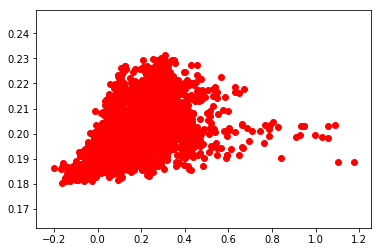

In [33]:
plt.scatter(df_new['predicted'], df_new['Actual'],color ='red')

## R2 value to check goodness of fit

it is equal to ss_res/ ss_tot

## Calculating SS_res

In [34]:
np.mean(df['Actual'])

0.00490530527225335

In [35]:
df['Actual'].shape

(3119,)

In [36]:
ss_res = sum((df['predicted'] - np.mean(df['Actual']))**2)

## Calculating SS_tot

In [37]:
ss_tot = sum((df['predicted']- df['Actual'])**2) + ss_res

In [38]:
r_square = ss_res/ss_tot

In [39]:
r_square

0.9777230647793861